In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\ASUS\OneDrive\Desktop\project-plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\ASUS\OneDrive\Desktop\project-plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:

mymodel = tf.keras.models.Sequential()

In [5]:
mymodel.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
mymodel.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
mymodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
mymodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
mymodel.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
mymodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
mymodel.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
mymodel.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
mymodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
mymodel.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
mymodel.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
mymodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
mymodel.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
mymodel.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
mymodel.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

add a dropout to avoid overfitting

In [10]:
mymodel.add(tf.keras.layers.Dropout(0.25))

In [11]:
mymodel.add(tf.keras.layers.Flatten())

In [12]:
mymodel.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
mymodel.add(tf.keras.layers.Dropout(0.4))

In [14]:
mymodel.add(tf.keras.layers.Dense(units=38,activation='softmax'))

compiling and training phase

In [15]:
mymodel.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [17]:
training_history = mymodel.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1800s 818ms/step - loss: 1.3212 - accuracy: 0.6086 - val_loss: 0.5097 - val_accuracy: 0.8409
Epoch 2/10
2197/2197 [==============================] - 5770s 3s/step - loss: 0.4345 - accuracy: 0.8623 - val_loss: 0.2726 - val_accuracy: 0.9120
Epoch 3/10
2197/2197 [==============================] - 2351s 1s/step - loss: 0.2640 - accuracy: 0.9157 - val_loss: 0.2143 - val_accuracy: 0.9289
Epoch 4/10
2197/2197 [==============================] - 2011s 915ms/step - loss: 0.1804 - accuracy: 0.9411 - val_loss: 0.1517 - val_accuracy: 0.9496
Epoch 5/10
2197/2197 [==============================] - 1963s 894ms/step - loss: 0.1298 - accuracy: 0.9582 - val_loss: 0.1515 - val_accuracy: 0.9507
Epoch 6/10
2197/2197 [==============================] - 3076s 1s/step - loss: 0.1043 - accuracy: 0.9654 - val_loss: 0.1825 - val_accuracy: 0.9444
Epoch 7/10
2197/2197 [==============================] - 7740s 4s/step - loss: 0.0836 - accuracy: 0.9732 - val_los

In [19]:
train_loss, train_acc = mymodel.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 393s 178ms/step - loss: 0.0198 - accuracy: 0.9944
Training accuracy: 0.994352400302887


In [20]:
#Validation set Accuracy
val_loss, val_acc = mymodel.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 96s 174ms/step - loss: 0.1027 - accuracy: 0.9690
Validation accuracy: 0.969041645526886


In [21]:
mymodel.save('trained_plant_disease_model.keras')

In [22]:
training_history.history

{'loss': [1.321239948272705,
  0.43449947237968445,
  0.26398995518684387,
  0.18043307960033417,
  0.12977395951747894,
  0.1042797639966011,
  0.08361399918794632,
  0.06966576725244522,
  0.06145849823951721,
  0.05511786416172981],
 'accuracy': [0.6085638999938965,
  0.8623088598251343,
  0.9156696796417236,
  0.9410768747329712,
  0.9581620097160339,
  0.9654313921928406,
  0.973198652267456,
  0.9770823121070862,
  0.9799843430519104,
  0.9823600649833679],
 'val_loss': [0.5096872448921204,
  0.27256375551223755,
  0.2143009603023529,
  0.15167786180973053,
  0.15146072208881378,
  0.18249109387397766,
  0.15336282551288605,
  0.11458189785480499,
  0.09138557314872742,
  0.10268490016460419],
 'val_accuracy': [0.840883195400238,
  0.9120191335678101,
  0.9288641214370728,
  0.9495788812637329,
  0.950717031955719,
  0.9444001913070679,
  0.9525381326675415,
  0.9630093574523926,
  0.9727407097816467,
  0.969041645526886]}

In [23]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


accuracy visualisation

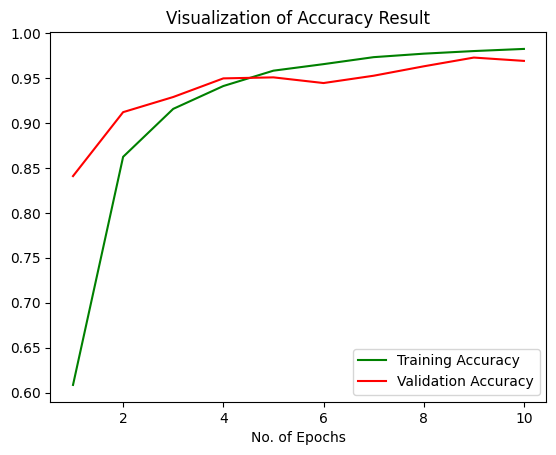

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_name = validation_set.class_names

In [5]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\ASUS\OneDrive\Desktop\project-plant\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

NameError: name 'tf' is not defined

In [27]:
y_pred = mymodel.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 356s 20ms/step


In [30]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
pred_true = tf.argmax(true_categories, axis=1)

In [31]:
pred_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(pred_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.99      0.94      0.96       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.95      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

In [2]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model('model.keras')

In [ ]:
y_pred1=model.predict(test_set[0])